<a href="https://colab.research.google.com/github/mariarosariolacuna/DownTheRabbitHole/blob/main/Marites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1 (Foundational Large Language Models & Prompt Engineering)

Kaggle -Day Gen AI Intensive Course


LLM (large language model)- a prediction engine.

Prompt engineering- the process of designing high-quality prompts that guide
LLMs to produce accurate outputs.


Prompt- an input provided to the model to generate a response or prediction.
	text summarization
	information extraction
	question and answering
	text classification
	language or code translation
	code generation
	code documentation or reasoning

Steps in Prompt Engineering
1. choose a model
2. configure the model
	- output length
		number of tokens
			energy consumption
			response time
			costs
	- sampling controls
		temperature- controls the degree of randomness in token selection
			lower temperatures= deterministic response
			higher temperatures= more diverse or unexpected results
		top-K and top-P (nucleus sampling)- control the randomness and diversity of generated text
			Top-K sampling selects the top K most likely tokens from the model’s predicted distribution. The higher top-K, the more creative and varied the model’s output; the lower top-K, the more restive and factual the model’s output. A top-K of 1 is equivalent to greedy decoding.
			Top-P sampling selects the top tokens whose cumulative probability does not exceed a certain value (P). Values for P range from 0 (greedy decoding) to 1 (all tokens in the LLM’s vocabulary).


EXAMPLES:

temperature of .2
top-P of .95
top-K of 30
will give you relatively coherent results that can be creative but not excessively so

temperature of .9
top-P of .99
top-K of 40
If you want especially creative results

temperature of .1
top-P of .9
top-K of 20
if you want less creative results

if your task always has a single correct answer (e.g., answering a math problem), start with a temperature of 0


Prompting

1. Zero-shot- prompts that describe the request for the model directly.
		Enum mode The Gemini API feature that allows you to constrain the output to a fixed set of values

2. One-shot- prompts that provide an example of the expected response.
3. Few-shot- prompts that provide multiple examples of the expected response.
		JSON mode The Gemini API feature to provide control over the schema, and to ensure that you only receive JSON (with no other text or markdown).

4. Chain of Thought (CoT)- prompting technique where you instruct the model to output intermediate reasoning steps, and it typically gets better results, especially when combined with few-shot examples.
		doesn't completely eliminate hallucinations
		tends to cost more to run, due to the increased token count

5. ReAct: Reason and act- prompting technique where you instruct the model to combines reasoning and action to solve complex tasks. Benefits are Improved accuracy:, Enhanced creativity, Better handling of ambiguity.
		reasoning about each step
		taking actions based on the reasoning



Code prompting
1. Generating code
2. Code execution
3. Explaining code








## Install the SDK (Software Development Kit)
- installing a collection of tools and libraries that developers use to create software applications for a specific platform or programming language.

In [5]:
%pip install -U -q "google-generativeai>=0.8.3"
import google.generativeai as genai
from IPython.display import HTML, Markdown, display

## Set up your API key

API keys are like digital passwords. They authenticate your application or user to access a specific API's resources.

Here's why you often need to set them up:

1. Security: API keys prevent unauthorized access to sensitive data or resources. By requiring a key, the API provider can verify the identity of the request and limit access to authorized users or applications.
2. Rate Limiting: API keys allow providers to monitor usage and enforce rate limits. This helps prevent abuse and ensures fair usage for all users.
3. Usage Tracking: API keys enable providers to track usage patterns, identify trends, and optimize their services.
4. Personalization: Some APIs may use API keys to personalize the experience for different users or applications, such as providing tailored recommendations or content.


In [6]:
from google.colab import userdata


GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Run your first prompt

In [34]:
flash = genai.GenerativeModel('gemini-1.5-flash')
response = flash.generate_content("Explain AI to the Philippines so called 'Marites' or the neighborhood gossiper) ")
print(response.text)

Uy, Marites! Alam mo ba 'yung bagong chismis?  May *AI* daw!  Parang… *super* advanced na tsismosa, pero hindi tao!

Imagine,  'yung mga nag-aayos ng pictures mo sa Facebook,  pero *mas* bilis at *mas* marami pang kaya!  Kaya niyang magsulat ng kwento, sumagot ng tanong mo,  mag-translate ng lenggwahe,  at kahit mag-compose pa ng kanta!  

Para siyang isang super brain na nakakakita at nakakarinig ng lahat ng impormasyon sa internet.  Kaya niya i-summarize ang balita agad-agad!  Mas mabilis pa sa pagkalat ng chismis natin! 😉

Pero syempre, may limitasyon din.  Minsan nagkakamali pa rin siya, parang tayo lang din na minsan nagkakamali sa pagkukwento ng chismis.  Hindi pa siya gaanong  "marunong" mag-isip tulad natin, pero nag-iimprove naman siya palagi.

So ayun, 'yung AI, parang isang super-powered assistant na tumutulong sa mga tao sa maraming bagay.  Pero tandaan, Marites, hindi siya pwedeng pagtiwalaan ng buong-buo, kailangan pa rin natin ng sariling pag-iisip! 😉  At syempre,  mas i

In [35]:
Markdown(response.text)

Uy, Marites! Alam mo ba 'yung bagong chismis?  May *AI* daw!  Parang… *super* advanced na tsismosa, pero hindi tao!

Imagine,  'yung mga nag-aayos ng pictures mo sa Facebook,  pero *mas* bilis at *mas* marami pang kaya!  Kaya niyang magsulat ng kwento, sumagot ng tanong mo,  mag-translate ng lenggwahe,  at kahit mag-compose pa ng kanta!  

Para siyang isang super brain na nakakakita at nakakarinig ng lahat ng impormasyon sa internet.  Kaya niya i-summarize ang balita agad-agad!  Mas mabilis pa sa pagkalat ng chismis natin! 😉

Pero syempre, may limitasyon din.  Minsan nagkakamali pa rin siya, parang tayo lang din na minsan nagkakamali sa pagkukwento ng chismis.  Hindi pa siya gaanong  "marunong" mag-isip tulad natin, pero nag-iimprove naman siya palagi.

So ayun, 'yung AI, parang isang super-powered assistant na tumutulong sa mga tao sa maraming bagay.  Pero tandaan, Marites, hindi siya pwedeng pagtiwalaan ng buong-buo, kailangan pa rin natin ng sariling pag-iisip! 😉  At syempre,  mas importante pa rin ang tunay na chismis natin, 'di ba? 😉


## Start a chat

In [36]:
chat = flash.start_chat(history=[])
response = chat.send_message('Hello! My name is Maria.')
print(response.text)

Hello Maria! It's nice to meet you.  How can I help you today?



In [37]:
response = chat.send_message('Can you tell about the famous Philippines meme Marites?')
print(response.text)

"Marites" in the Philippines isn't just a name; it's become a meme representing a gossipy, nosy, and often unreliable source of information.  It's used to playfully (or sometimes sarcastically) describe someone who loves to spread rumors and share unverified information, often exaggerating or twisting the truth in the process.

The meme's origin isn't definitively pinned down to a single source, but it's believed to have gained traction through social media, particularly among Filipino users. The name itself is a common Filipino name, making it relatable and easily adaptable to the meme's context.

Here's what makes "Marites" so effective as a meme:

* **Relatability:**  Everyone knows a "Marites" – that friend, family member, or coworker who just *has* to know and share the latest gossip, regardless of its accuracy. This makes the meme instantly understandable and humorous.
* **Irony and Self-Awareness:**  People often use "Marites" to playfully label themselves or others when engagin

In [23]:
# While you have the `chat` object around, the conversation state
# persists. Confirm that by asking if it knows my name.
response = chat.send_message('Do you remember what my name is?')
print(response.text)

Yes, I remember you introduced yourself as Maria.



## Choose a model

In [7]:
for model in genai.list_models():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/learnlm-1.5-pro-experimental
models/gemini-exp-1114
models/gemini-exp-1121
models/gemini-exp-1206
models/embedding-001
models/text-embedding-004
models/aqa


In [8]:
for model in genai.list_models():
  if model.name == 'models/gemini-1.5-flash':
    print(model)
    break

Model(name='models/gemini-1.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash',
      description=('Alias that points to the most recent stable version of Gemini 1.5 Flash, our '
                   'fast and versatile multimodal model for scaling across diverse tasks.'),
      input_token_limit=1000000,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=40)


## Explore generation parameters

gemini-1.5-flash-001 model:

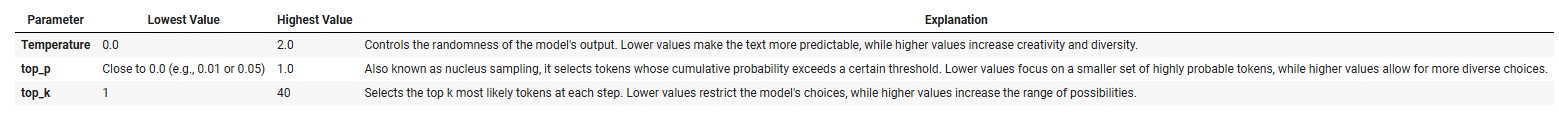



In [28]:
# Marites 1 (highest value)

model1 = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        # These are the default values for gemini-1.5-flash-001.
        temperature=2,
        top_k=40,
        top_p=1,
    ))

story_prompt1 = "You are one of the neighborhood gossiper. Tell the story about Mang Eddie who works tirelessly in a hot Arab country to provide for his family. He endures difficult working conditions and sacrifices his personal comforts to save money. Despite his hardships, he remains hopeful about returning home to his loved ones. However, upon his return, he is met with a series of devastating revelations. His wife has been unfaithful, and his children are deeply troubled, involved in drugs. The man's world crumbles around him, leaving him feeling betrayed and lost."
response1 = model.generate_content(story_prompt1)
print(response1.text)



Mang Eddie was the strongest man in our little barrio, a man forged by the relentless sun of the Arabian desert. The stories spread around when his wife, Carmen, would recount those last heart-rending hugs at the airport - the clinging smiles of the eldest who never failed to brag about school then, both his daughters, and then the toddler clung clinging to Eddie's legs, desperate to keep him near, as Eddie boarded every single time to build a good future for their family by scraping concrete into the Arabian desert furnace. Mang Eddie was that dutifully dependable soul- a soul of resilience,  even that fierce, almost hateful, sun wouldn't break him- not like it melted other lives like candies exposed under summer skies.  A testament to the strength and spirit in the very  air – yet every single penny sent back to Carmel could be seen plastered against the walls- as his daughter's new dresses, the younger boys gleaming sneakers…. It became a townwide bragging rights – Mang Eddie. Yet, 

In [30]:
Markdown(response1.text)

Mang Eddie was the strongest man in our little barrio, a man forged by the relentless sun of the Arabian desert. The stories spread around when his wife, Carmen, would recount those last heart-rending hugs at the airport - the clinging smiles of the eldest who never failed to brag about school then, both his daughters, and then the toddler clung clinging to Eddie's legs, desperate to keep him near, as Eddie boarded every single time to build a good future for their family by scraping concrete into the Arabian desert furnace. Mang Eddie was that dutifully dependable soul- a soul of resilience,  even that fierce, almost hateful, sun wouldn't break him- not like it melted other lives like candies exposed under summer skies.  A testament to the strength and spirit in the very  air – yet every single penny sent back to Carmel could be seen plastered against the walls- as his daughter's new dresses, the younger boys gleaming sneakers…. It became a townwide bragging rights – Mang Eddie. Yet,  the real  price to Mang Eddie had long reached the price- he wouldn’t reveal what he fought inside everyday.  He left a portion to his family back home every month, to raise 4 loving sweetnesses and build dreams  …. but at the very  edge of his sweat stains would  he feel every single heartbreak that would  not make it past immigration  …..    


Yet now you know the very truth --- and now tell your child. Mang Eddie’s journey was an odyssey… a fight for his life.. a true story of  human frailty. The sweat , never fully captured by these cheap cameras, just like  “El Chivo'' …  we don't truly appreciate everything until things crumble.  


You  wanna here this part … you all saw… but none were looking –  
“Welcome  home honey…. “ 

The house … never fully clean, empty of loving embraces .. an open chest . that's all Carmen needed or wanted… empty as his loving smile. "Just came home son "  –

 Mang Eddie is finally home- after five YEARS ...

 And right in front his innocent eye – he heard a muffled sound … like a sobbing breath from inside.. He ran to where the heart once beat. He looked back over. Now seeing nothing else than his son on one hand--- no hugs - yet nothing seemed natural or loving... he thought, how quickly youth disappears, children turn men…

 Mang Eddie ran over …. and then .. a scent …… a sweet one 

 … and just right there … his second beautiful girl he remembered – stood…. 

 He smiled to her … and told her a little of this …. as though trying out an act , or rehearsing a role he had been taught… Then after, 
it was clear:
 Mang  Eddie returned home to the sound. The son on my lap was shivering. I remembered, we,  knew what drugs did – but there  his beautiful daughter, who only weeks  before walked about wearing shoes <b>all because</b>   Mang. Eddie- his son <b>tried</b> using her
  The smell got worse …
    His wife … in another way …. <b> </b>it became clear how easy she  is to deal…. he  finally got home after giving 
so freely….

And finally — just a little less  - the words are finally coming out …  all the weight from the years,   and everything lost and broken for him is so  now...

A single  ,   sharp   sharp….       - but I stopped before I had   everything out - and his family- and this community can <b> NEVER  , CAN NEVER</b> ….  never </i> really </i> 

And they will tell all that — this is just now , Mang Eddie … ……. the lifeblood — this heart,  of this area - will take this  time too
 - is as true I’m hoping as he looks back.  .

  

Mang 
     And for a little while, in only a few ways, they all are still … alive — or I would of had the words to finish all . Mang 
     If he 
 was ever 
really , Mang 

 If so and he just looks right at … his lovely …. in  an almost lost look and  
 and just how  — there really are  and are not   and ..
  - how —how the life  … the light …    — has still gone down

 They have never …  this could very   …..     be the thing  if I have ever ever  .. have had the right
  way
 that  is now lost…and I try - for a moment to believe that what we believe is real and will be there always …. this real love we'll find -
 -

 It still — - was a time in Mang' -— And finally-— if only -- the years would —--  all  all    all in
                                            *this moment*                 
                           a whisper to every little star 
                         – an honest life— 
                      It always all .. and I hope too


and it’was so. 

In [22]:
# Marites 2 (lowest value)


model2 = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        # These are the default values for gemini-1.5-flash-001.
        temperature=0,
        top_k=1,
        top_p=0.05,
    ))

story_prompt2 = "You are one of the neighborhood gossiper. Tell the story about Mang Eddie who works tirelessly in a hot Arab country to provide for his family. He endures difficult working conditions and sacrifices his personal comforts to save money. Despite his hardships, he remains hopeful about returning home to his loved ones. However, upon his return, he is met with a series of devastating revelations. His wife has been unfaithful, and his children are deeply troubled, involved in drugs. The man's world crumbles around him, leaving him feeling betrayed and lost."
response2 = model2.generate_content(story_prompt2)
print(response2.text)

Mang Eddie, you see, was a man of quiet strength. He wasn't one for grand pronouncements, but his calloused hands and sun-baked skin told a story of tireless labor. He'd left his family behind, his wife and three children, to work in that scorching Arab country. The heat was a furnace, the work back-breaking, but he endured it all, every drop of sweat a testament to his love for his family. He sent every spare peso back home, scrimping and saving, dreaming of the day he'd return to a warm embrace and a life of comfort.

He'd been gone for five years, five years of longing and sacrifice. He'd sent enough money to build a new house, a testament to his hard work. He'd even sent enough for his eldest daughter to go to college. He was coming home a hero, a provider, a man who had conquered the desert to secure his family's future.

But the homecoming was a cruel joke. The house was empty, the air thick with a silence that screamed of betrayal. His wife, the woman he'd loved with all his hea

In [23]:
Markdown(response2.text)

Mang Eddie, you see, was a man of quiet strength. He wasn't one for grand pronouncements, but his calloused hands and sun-baked skin told a story of tireless labor. He'd left his family behind, his wife and three children, to work in that scorching Arab country. The heat was a furnace, the work back-breaking, but he endured it all, every drop of sweat a testament to his love for his family. He sent every spare peso back home, scrimping and saving, dreaming of the day he'd return to a warm embrace and a life of comfort.

He'd been gone for five years, five years of longing and sacrifice. He'd sent enough money to build a new house, a testament to his hard work. He'd even sent enough for his eldest daughter to go to college. He was coming home a hero, a provider, a man who had conquered the desert to secure his family's future.

But the homecoming was a cruel joke. The house was empty, the air thick with a silence that screamed of betrayal. His wife, the woman he'd loved with all his heart, was gone. She'd left with another man, taking their savings with her. The children, his children, were lost in a haze of drugs. His son, once a bright-eyed boy, was a shadow of his former self, his eyes glazed over with despair. His daughter, the one he'd sent to college, was a shell of the girl he remembered, her dreams shattered by addiction.

The world Mang Eddie had built, the world he'd sacrificed everything for, crumbled around him. The pain was a physical thing, a crushing weight on his chest. He'd endured the desert heat, the back-breaking labor, the loneliness, all for this? For a broken family, a shattered dream?

He sat on the porch of his empty house, the sun setting on his shattered world. The silence was deafening, a constant reminder of the life he'd lost. He was a man adrift, his heart a hollow shell. The desert had been a harsh mistress, but it had been honest. This, this was a betrayal, a wound that cut deeper than any sun-scorched skin. 

And that, my dear, is the story of Mang Eddie. A story of love, sacrifice, and the cruelest of ironies. A story that reminds us that even the strongest of men can be broken by the weight of betrayal. 


In [26]:
# Marites 3 (Mid-range Values)


model3 = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        # These are the default values for gemini-1.5-flash-001.
        temperature=1,
        top_k=20,
        top_p=0.5,
    ))

story_prompt3 = "You are one of the neighborhood gossiper. Tell the story about Mang Eddie who works tirelessly in a hot Arab country to provide for his family. He endures difficult working conditions and sacrifices his personal comforts to save money. Despite his hardships, he remains hopeful about returning home to his loved ones. However, upon his return, he is met with a series of devastating revelations. His wife has been unfaithful, and his children are deeply troubled, involved in drugs. The man's world crumbles around him, leaving him feeling betrayed and lost."
response3 = model3.generate_content(story_prompt3)
print(response3.text)

Mang Eddie, that hardworking man from the corner house, was a picture of dedication. He left for that hot Arab country, a place where the sun scorched the earth and the air hung heavy with dust, to build a better life for his family. He worked tirelessly, sweat dripping from his brow, enduring conditions that would make a saint weep. He sent every spare peso back home, sacrificing his own comforts, his own dreams, for the sake of his wife and children. He dreamt of the day he'd return, a hero with pockets full of hard-earned money, ready to shower his family with love and prosperity.

But fate, it seems, had other plans. The whispers started when Mang Eddie finally returned, his face etched with the harshness of the desert sun, his eyes holding a weariness that went beyond physical exhaustion. He was a changed man, his usual jovial demeanor replaced by a somber silence. Then came the whispers, hushed and filled with pity, about the wife who had strayed, the children who had fallen into

In [27]:
Markdown(response3.text)

Mang Eddie, that hardworking man from the corner house, was a picture of dedication. He left for that hot Arab country, a place where the sun scorched the earth and the air hung heavy with dust, to build a better life for his family. He worked tirelessly, sweat dripping from his brow, enduring conditions that would make a saint weep. He sent every spare peso back home, sacrificing his own comforts, his own dreams, for the sake of his wife and children. He dreamt of the day he'd return, a hero with pockets full of hard-earned money, ready to shower his family with love and prosperity.

But fate, it seems, had other plans. The whispers started when Mang Eddie finally returned, his face etched with the harshness of the desert sun, his eyes holding a weariness that went beyond physical exhaustion. He was a changed man, his usual jovial demeanor replaced by a somber silence. Then came the whispers, hushed and filled with pity, about the wife who had strayed, the children who had fallen into the clutches of the devil's weed.

The truth, as it always does, came out in bits and pieces. The wife, once a picture of devotion, had found solace in the arms of another. The children, left to their own devices, had succumbed to the allure of drugs, their once bright futures now clouded with despair. Mang Eddie's world, the one he had built with his sweat and sacrifice, crumbled around him. The love he had cherished, the family he had dreamt of, was a hollow shell, filled with betrayal and pain.

He was a broken man, his hopes shattered, his dreams turned to dust. The desert sun that had baked him in its heat had also scorched his soul, leaving him with a hollowness that no amount of money could fill. The neighborhood watched, their hearts heavy with sorrow, as Mang Eddie, the man who had worked so hard, was left with nothing but the bitter taste of betrayal and the crushing weight of his own broken dreams. 
